<a href="https://colab.research.google.com/github/Karthikeyan-Ravichandran22/Convolutional-Neural-Network--Concepts/blob/main/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 97% 1.03G/1.06G [00:06<00:00, 207MB/s]
100% 1.06G/1.06G [00:06<00:00, 182MB/s]


In [3]:
import zipfile
zip_rep=zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip_rep.extractall("/content")
zip_rep.close()


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [6]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [30]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 76s 120ms/step - loss: 1.0354 - accuracy: 0.5742 - val_loss: 0.6438 - val_accuracy: 0.5950
Epoch 2/10
625/625 [==============================] - 76s 121ms/step - loss: 0.5893 - accuracy: 0.6782 - val_loss: 0.5869 - val_accuracy: 0.6734
Epoch 3/10
625/625 [==============================] - 76s 121ms/step - loss: 0.5044 - accuracy: 0.7505 - val_loss: 0.4955 - val_accuracy: 0.7552
Epoch 4/10
625/625 [==============================] - 77s 122ms/step - loss: 0.4214 - accuracy: 0.8037 - val_loss: 0.4126 - val_accuracy: 0.8206
Epoch 5/10
625/625 [==============================] - 76s 121ms/step - loss: 0.3353 - accuracy: 0.8493 - val_loss: 0.9014 - val_accuracy: 0.6120
Epoch 6/10
625/625 [==============================] - 76s 121ms/step - loss: 0.2653 - accuracy: 0.8824 - val_loss: 0.3293 - val_accuracy: 0.8734
Epoch 7/10
625/625 [==============================] - 76s 121ms/step - loss: 0.2086 - accuracy: 0.9097 - val_loss: 0.3754 - val_ac

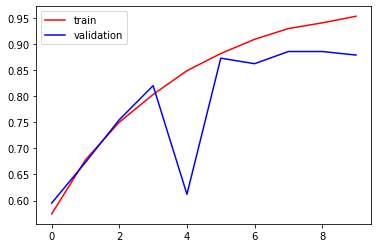

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

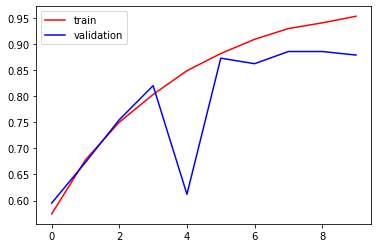

In [35]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

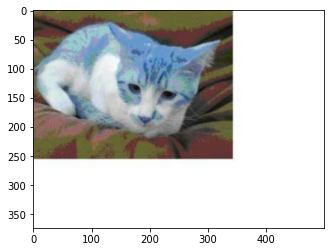

In [73]:
import cv2
test_img = cv2.imread('/content/test/cats/cat.10033.jpg')
plt.imshow(test_img)

In [74]:
print(test_img.shape)
test_img = cv2.resize(test_img,(256,256))


(374, 500, 3)


In [75]:
test_input = test_img.reshape((1,256,256,3))

In [76]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)